<a href="https://colab.research.google.com/github/tienvtt/Stock-Analysis-and-Prediction-Applying-Machine-Learning/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives**:
- Use mathematical and statistical techniques and to analyze patterns, trends
- Utilize machine learning algorithm to predict stock price.
- Compare stocks belonged to Financial Services: SSI, VND, VCI, VIX, HCM for data-driven decisions.

# **Install library and load data**

In [ ]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

Cloning into 'vnquant'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 431 (delta 23), reused 22 (delta 22), pack-reused 392 (from 1)
Receiving objects: 100% (431/431), 1.06 MiB | 2.58 MiB/s, done.
Resolving deltas: 100% (233/233), done.
/content/vnquant/vnquant/vnquant
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/di

In [ ]:
import pandas as pd
import vnquant.data as vnq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define stock symbols
symbols = ["SHB", "VHM", "FPT", "HPG","HCM"]

# Store DataFrames for each stock
stock_data = {}

for symbol in symbols:
    loader = vnq.DataLoader(
        symbols=symbol,
        start="2023-01-01",
        end="2025-03-21",
        minimal=True,
        data_source="cafe"
    )

    # Download and store DataFrame
    df = pd.DataFrame(loader.download())

    df.columns = df.columns.droplevel(level=1)

    stock_data[symbol] = df

    # Print first few rows for verification
    print(f"Data for {symbol}:")
    print(df.head(), "\n")


# Assign DataFrames to individual variables
df_shb = stock_data["SHB"]
df_vhm = stock_data["VHM"]
df_fpt = stock_data["FPT"]
df_hpg = stock_data["HPG"]
df_hcm = stock_data["HCM"]

[2025-03-24 17:53:09] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['SHB'] from CAFEF, start: 01/01/2023, end: 21/03/2025!
[2025-03-24 17:53:11] - Assitant - INFO      - download_one - line 94 - data SHB from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-24 17:53:11] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['VHM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for SHB:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  SHB  12.05  11.65  11.85  11.75   11.75    74606600.0   
2025-03-20  SHB  11.90  11.50  11.65  11.75   11.75    79891400.0   
2025-03-19  SHB  11.80  11.40  11.50  11.65   11.65    68781700.0   
2025-03-18  SHB  11.70  11.10  11.25  11.60   11.60    71982900.0   
2025-03-17  SHB  11.40  10.90  10.95  11.25   11.25    94585500.0   

Attributes   value_match  
date                      
2025-03-21  8.834230e+11  
2025-03-20  9.347830e+11  
2025-03-19  8.011410e+11  
2025-03-18  8.175310e+11  
2025-03-17  1.066489e+12   



[2025-03-24 17:53:12] - Assitant - INFO      - download_one - line 94 - data VHM from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-24 17:53:12] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['FPT'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for VHM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  VHM  48.40  47.10  47.10  48.25   48.25    13695700.0   
2025-03-20  VHM  48.20  46.95  47.35  47.35   47.35    13458400.0   
2025-03-19  VHM  47.90  46.25  46.80  47.35   47.35    13442500.0   
2025-03-18  VHM  48.75  46.80  47.60  47.30   47.30    12239500.0   
2025-03-17  VHM  48.00  46.80  47.95  47.80   47.80    11017800.0   

Attributes   value_match  
date                      
2025-03-21  6.590010e+11  
2025-03-20  6.384460e+11  
2025-03-19  6.318710e+11  
2025-03-18  5.820090e+11  
2025-03-17  5.240910e+11   



[2025-03-24 17:53:14] - Assitant - INFO      - download_one - line 94 - data FPT from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-24 17:53:14] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HPG'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for FPT:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  FPT  129.0  125.0  125.0  128.0   128.0     6424800.0   
2025-03-20  FPT  126.8  124.5  124.6  125.0   125.0     8203400.0   
2025-03-19  FPT  130.6  123.5  130.1  124.6   124.6    18128400.0   
2025-03-18  FPT  132.2  130.0  130.1  130.0   130.0     5508500.0   
2025-03-17  FPT  132.1  129.6  131.6  130.0   130.0     6707000.0   

Attributes   value_match  
date                      
2025-03-21  8.202040e+11  
2025-03-20  1.027201e+12  
2025-03-19  2.288715e+12  
2025-03-18  7.197290e+11  
2025-03-17  8.748980e+11   



[2025-03-24 17:53:16] - Assitant - INFO      - download_one - line 94 - data HPG from 2023-01-01 to 2025-03-21 have already cloned!
[2025-03-24 17:53:16] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['HCM'] from CAFEF, start: 01/01/2023, end: 21/03/2025!


Data for HPG:
Attributes code   high    low  open  close  adjust  volume_match   value_match
date                                                                          
2025-03-21  HPG  27.25  27.05  27.1  27.15   27.15    18912200.0  5.135380e+11
2025-03-20  HPG  27.45  27.05  27.3  27.15   27.15    25022500.0  6.794540e+11
2025-03-19  HPG  27.60  27.10  27.6  27.25   27.25    37925600.0  1.036355e+12
2025-03-18  HPG  28.05  27.60  27.9  27.60   27.60    18741700.0  5.209910e+11
2025-03-17  HPG  28.15  27.75  27.9  27.85   27.85    19719700.0  5.514120e+11 



[2025-03-24 17:53:17] - Assitant - INFO      - download_one - line 94 - data HCM from 2023-01-01 to 2025-03-21 have already cloned!


Data for HCM:
Attributes code   high    low   open  close  adjust  volume_match  \
date                                                                
2025-03-21  HCM  32.15  31.85  32.00  31.85   31.85     7561400.0   
2025-03-20  HCM  32.45  31.70  32.00  32.05   32.05     7952100.0   
2025-03-19  HCM  32.00  31.35  31.65  31.95   31.95    10722700.0   
2025-03-18  HCM  32.40  31.75  32.35  31.75   31.75     8207900.0   
2025-03-17  HCM  32.30  31.80  32.00  32.30   32.30     5418900.0   

Attributes   value_match  
date                      
2025-03-21  2.416840e+11  
2025-03-20  2.546920e+11  
2025-03-19  3.398620e+11  
2025-03-18  2.629520e+11  
2025-03-17  1.735320e+11   



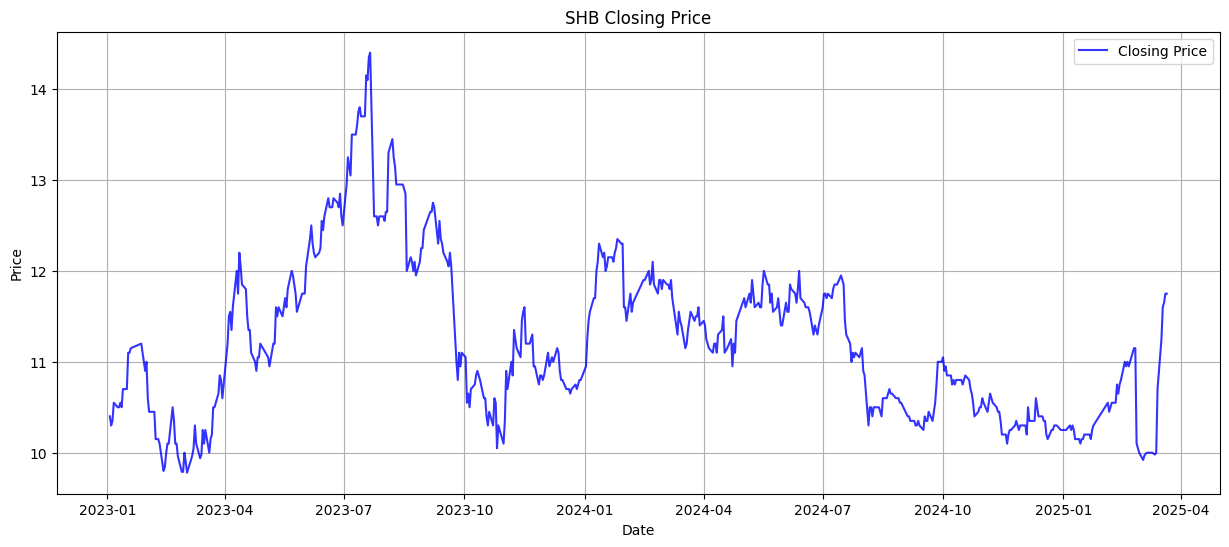

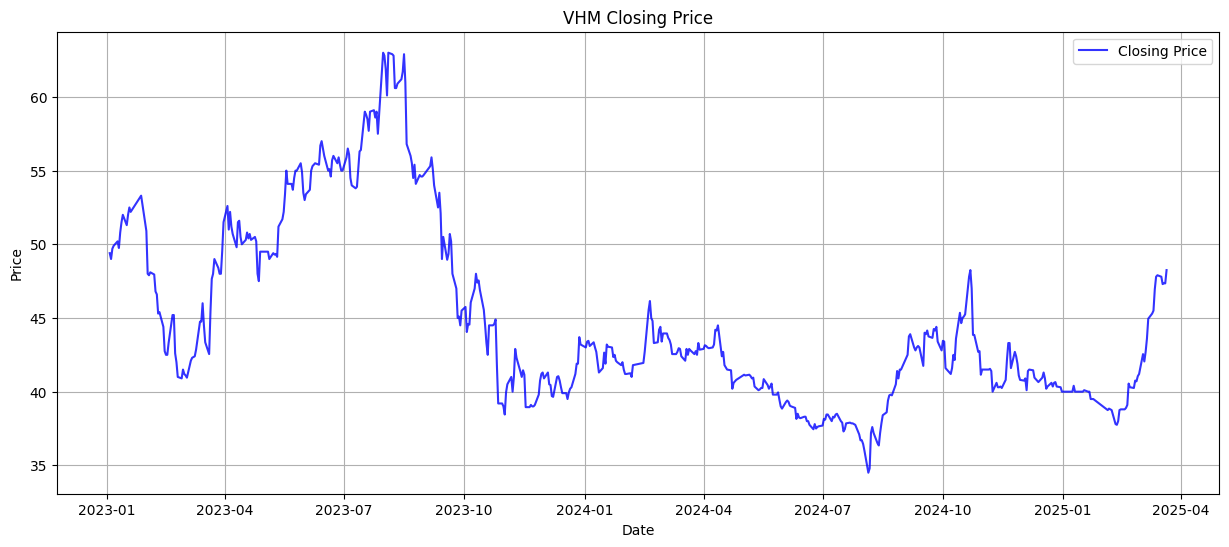

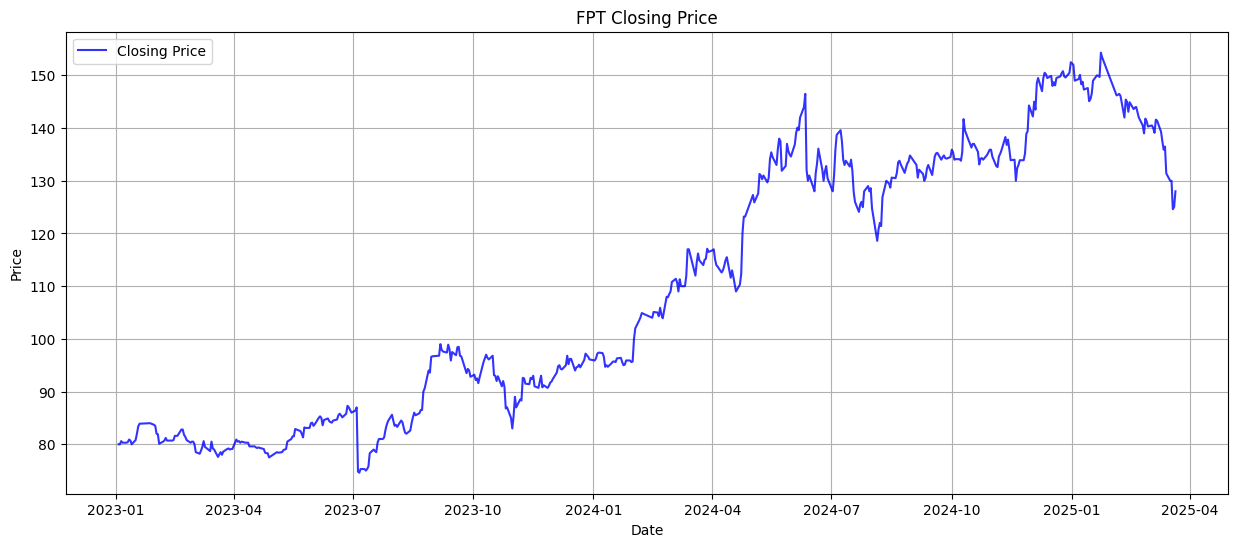

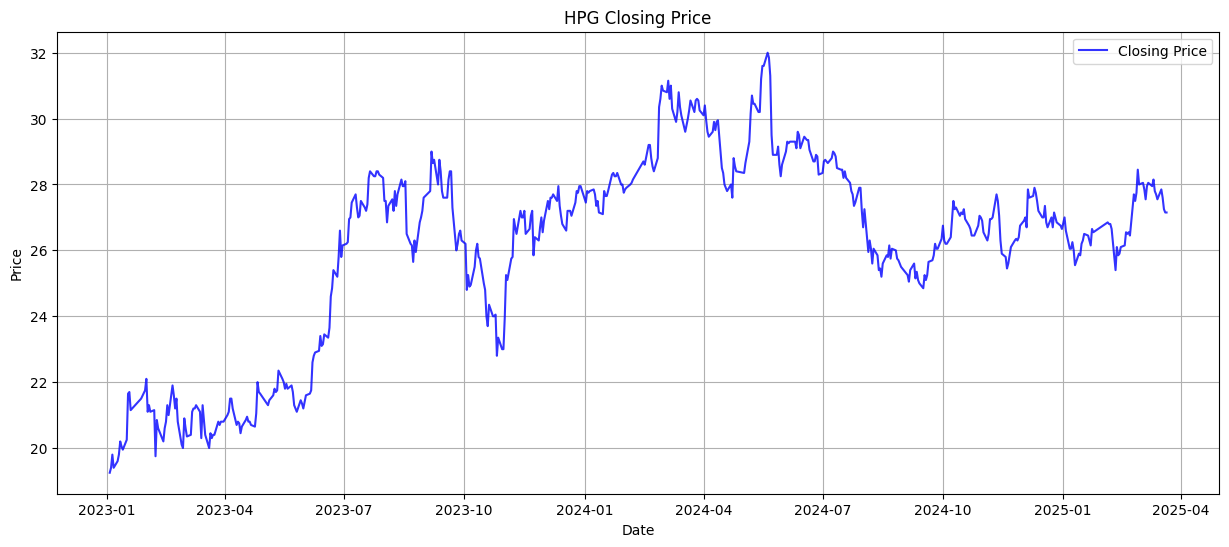

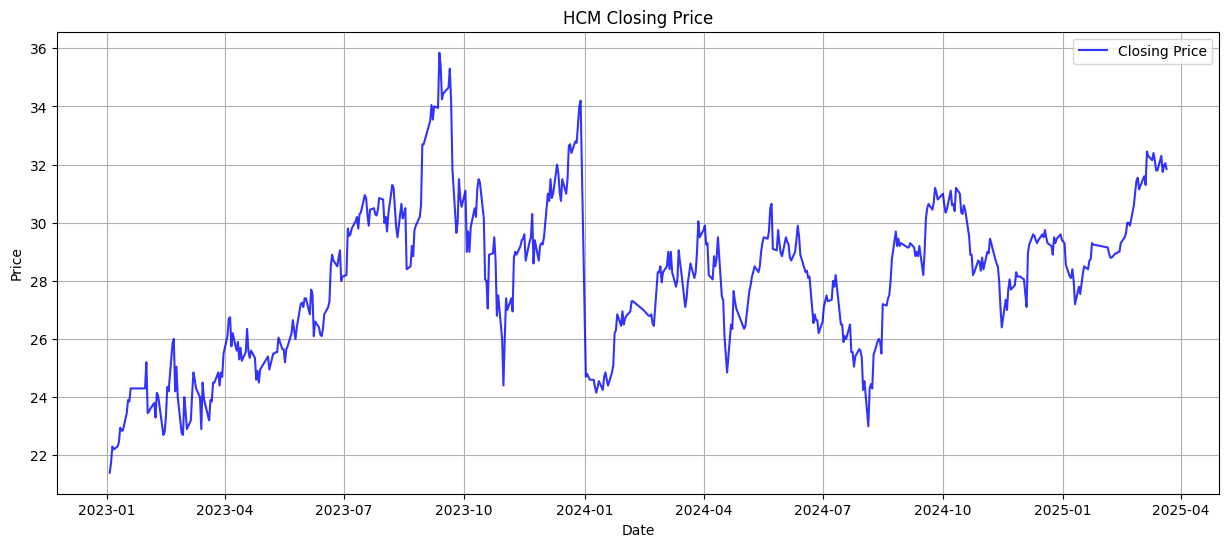

In [ ]:
def plot_price_trend(df, symbol):
    """Plot Closing Price & SMA from a given start date."""
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df["close"], label="Closing Price", color="blue", alpha=0.8)
    plt.title(f"{symbol} Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()
plot_price_trend(df_shb,"SHB")
plot_price_trend(df_vhm,"VHM")
plot_price_trend(df_fpt,"FPT")
plot_price_trend(df_hpg,"HPG")
plot_price_trend(df_hcm,"HCM")


In [ ]:
def stock_info(df):
  print (df.info())
  print (df.isnull().sum())

stock_info(df_shb)
stock_info(df_vhm)
stock_info(df_fpt)
stock_info(df_hpg)
stock_info(df_hcm)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2025-03-21 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          550 non-null    object 
 1   high          550 non-null    float64
 2   low           550 non-null    float64
 3   open          550 non-null    float64
 4   close         550 non-null    float64
 5   adjust        550 non-null    float64
 6   volume_match  550 non-null    float64
 7   value_match   550 non-null    float64
dtypes: float64(7), object(1)
memory usage: 38.7+ KB
None
Attributes
code            0
high            0
low             0
open            0
close           0
adjust          0
volume_match    0
value_match     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2025-03-21 to 2023-01-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code   

# **Machine Learning**

In [ ]:
df_shb = df_shb.sort_index()  # Sắp xếp lại theo index (thường là datetime)
df_shb

Attributes,code,high,low,open,close,adjust,volume_match,value_match
date,,,,,,,,
2023-01-03,SHB,10.45,9.95,9.96,10.40,7.61,14685300.0,1.501020e+11
2023-01-04,SHB,10.60,10.30,10.40,10.30,7.53,10146900.0,1.057730e+11
2023-01-05,SHB,10.45,10.20,10.40,10.35,7.57,8999100.0,9.292500e+10
2023-01-06,SHB,11.00,10.30,10.40,10.55,7.72,33967000.0,3.648060e+11
2023-01-09,SHB,10.80,10.50,10.70,10.50,7.68,12621500.0,1.341800e+11
...,...,...,...,...,...,...,...,...
2025-03-17,SHB,11.40,10.90,10.95,11.25,11.25,94585500.0,1.066489e+12
2025-03-18,SHB,11.70,11.10,11.25,11.60,11.60,71982900.0,8.175310e+11
2025-03-19,SHB,11.80,11.40,11.50,11.65,11.65,68781700.0,8.011410e+11


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def prepare_data(df, feature_col='close', seq_length=10):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(df[[feature_col]].values)

    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])

    X, y = np.array(X), np.array(y)
    train_size = int(len(X) * 0.8)

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32), \
           torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32), scaler

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])



In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=50):
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


In [ ]:
def evaluate_model(model, X_test, y_test, scaler):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).numpy()
    y_pred = scaler.inverse_transform(y_pred)
    y_actual = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_actual, y_pred)

    print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}')
    return y_pred


In [ ]:
def plot_results(df, y_pred, feature_col='close'):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index[-len(y_pred):], df[feature_col].values[-len(y_pred):], label='Actual')
    plt.plot(df.index[-len(y_pred):], y_pred, label='Predicted', linestyle='dashed')
    plt.legend()
    plt.show()

In [ ]:
def process_stock(df, hidden_size=50, num_layers=2, lr=0.001, batch_size=16, num_epochs=50):
    X_train, y_train, X_test, y_test, scaler = prepare_data(df)
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)

    model = LSTMModel(hidden_size=hidden_size, num_layers=num_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)
    y_pred = evaluate_model(model, X_test, y_test, scaler)
    plot_results(df, y_pred)

Training model for df_shb...
Epoch 10/50, Loss: 0.0078
Epoch 20/50, Loss: 0.0028
Epoch 30/50, Loss: 0.0040
Epoch 40/50, Loss: 0.0035
Epoch 50/50, Loss: 0.0007
MAE: 0.0959, MSE: 0.0333, RMSE: 0.1825, R2 Score: 0.7626


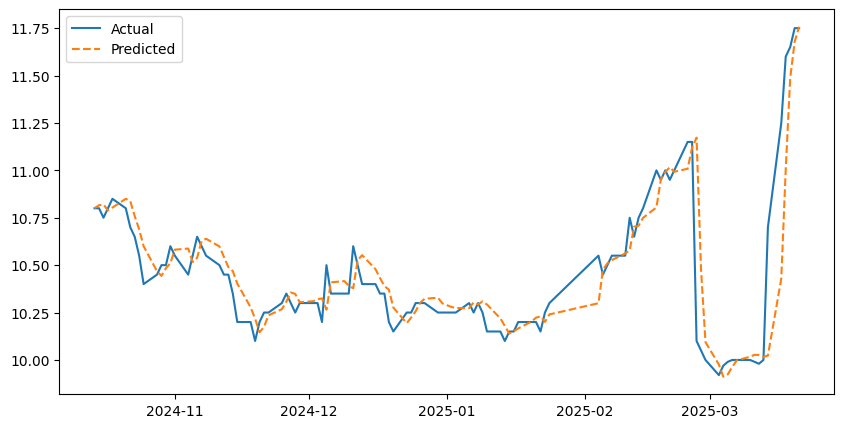

In [ ]:
# Train model chỉ với df_shb
print("Training model for df_shb...")
df_shb_hyperparams = {'hidden_size': 64, 'num_layers': 2, 'lr': 0.001, 'batch_size': 24, 'num_epochs': 50}
process_stock(df_shb, **df_shb_hyperparams)